# FNN

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Check size of images
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


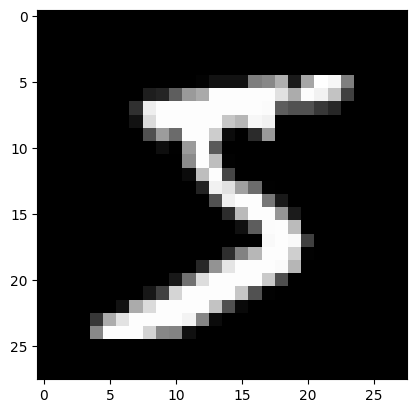

In [5]:
# Visualize the first image of train set
plt.imshow(train_images[0], cmap='gray')
# cmap='gray', vmin=0, vmax=255
# map 0 to black and 255 to white
plt.show()

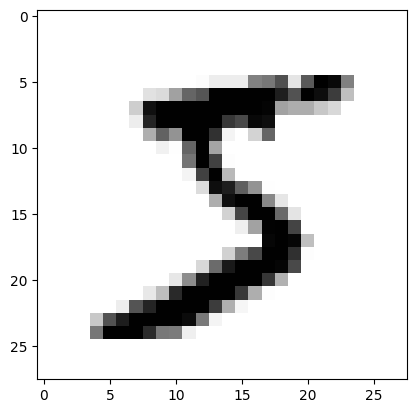

In [6]:
# Visualize the first image of train set
plt.imshow(train_images[0], cmap='gray_r')
# cmap='gray_r', vmin=0, vmax=255
# reverse version of cmap='gray'
plt.show()

In [7]:
# Reshape the input data format from 3D to 2D (flattening)
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [8]:
# Scaling the input
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# One-hot encoding for target variable
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [11]:
print(train_labels_one_hot.shape)
print(test_labels_one_hot.shape)

(60000, 10)
(10000, 10)


In [13]:
# Initilize model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Set optimizer, loss function, and evaluation metric
rmsprop = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Fit the model
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2636 - accuracy: 0.9247
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1066 - accuracy: 0.9690
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0701 - accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0508 - accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0374 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0291 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0124 - accuracy: 0.9968
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0090 - accura

In [16]:
# Evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0649 - accuracy: 0.9805


[0.06494878977537155, 0.9804999828338623]

In [17]:
# Predict test label using model
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(test_images[0:1])

1/1 [==============================] - 0s 96ms/step


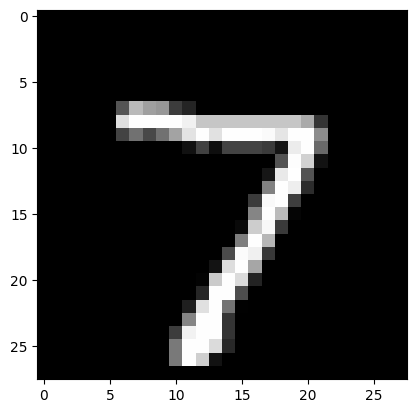

In [18]:
# Visualize test image
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.show()

In [19]:
# Compare true value and predicted value
print('True value:', test_labels[0])
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print('Predicted value:', labels[np.argmax(prediction)])

True value: 7
Predicted value: 7


In [20]:
# Check confusion matrix
y_preds_prob = model.predict(test_images)
print(y_preds_prob.shape)
y_preds = np.argmax(y_preds_prob, axis=1)
print(y_preds.shape)
print(confusion_matrix(test_labels, y_preds))
print(classification_report(test_labels, y_preds))

313/313 [==============================] - 1s 4ms/step
(10000, 10)
(10000,)
[[ 970    0    0    1    0    1    3    1    3    1]
 [   0 1117    3    3    0    1    2    2    7    0]
 [   6    0 1004    4    2    0    2    8    6    0]
 [   1    0    4  997    0    1    0    3    1    3]
 [   2    0    2    1  964    0    3    3    1    6]
 [   3    0    0   18    1  862    3    1    3    1]
 [   2    3    0    1    2    3  944    0    3    0]
 [   0    1    4    2    0    0    0 1014    4    3]
 [   1    0    3    7    5    1    1    4  951    1]
 [   2    2    0    6    7    1    1    7    1  982]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6  

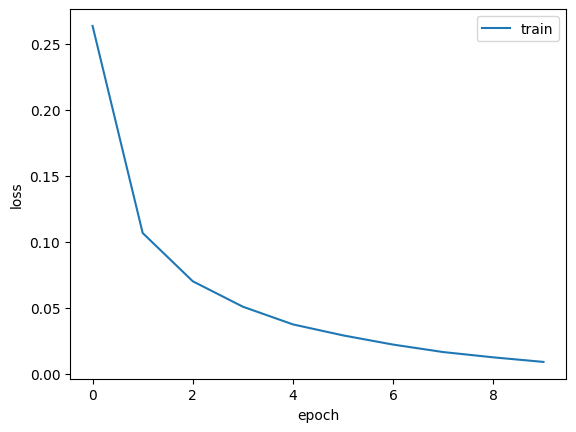

In [21]:
# Visualize loss
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

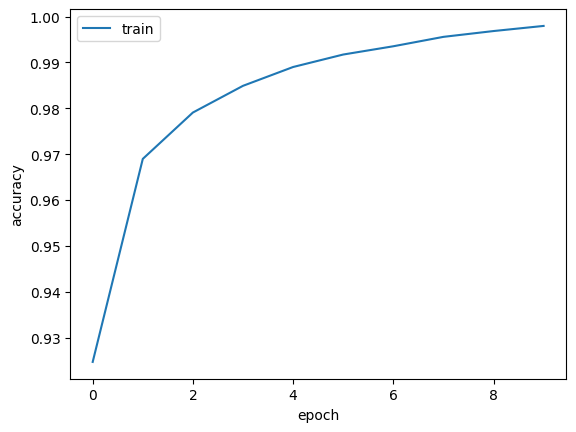

In [22]:
# Visualize accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()